# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [49]:
import pandas as pd
import numpy as np
import re

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. `'Italy9'` should be `'Italy'`. 

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [50]:
Energy = pd.read_excel("Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units


# Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors = 'coerce')

Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES

Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

Energy[Energy['Country'] == 'Guam']

,Country,Energy Supply,Energy Supply per Capita,% Renewable
87,Guam,NaN,NaN,0.0


## Renaming the countries using .replace() method

1) Renaming the countries with parenthesis in their name

In [51]:
# INSPIRATION: Energy['Country'] = Energy['Country'].str.replace(r"\([^)]*\)", "", regex=True) 

#Energy.replace(r"\(*\)", "", regex=True, inplace=True)

Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )

Energy[Energy['Country'] == 'Bolivia']

,Country,Energy Supply,Energy Supply per Capita,% Renewable
25,Bolivia,336000000.0,32.0,31.47712


2) Renaming the countries with Numeric digits in their name using look behind.

Positive Lookbehind: (?<=Y)X, matches X only if X is preceded by Y. For example, (?<=\d)\w will match a word character that directly follows a digit, but the digit itself will not be part of the match.

In [52]:
Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) #using positive look behind (?<=...) 

Energy[Energy['Country'] == 'Italy']

,Country,Energy Supply,Energy Supply per Capita,% Renewable
104,Italy,6.530000e+09,109.0,33.66723


3) Renaming the 4 countries specified in the question

In [53]:
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

Energy['Country'] = Energy['Country'].replace(rename_dict)


In [54]:
Energy.set_index('Country', inplace=True)

Energy.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Viet Nam', 'Wallis and Futuna Islands', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=227)

## Other guy

In [55]:
Energy = pd.read_excel("Energy Indicators.xls", usecols="C:F")

# exclude the footer and header, and rename the column names
Energy = Energy[18:245].reset_index(drop=True)
Energy = Energy.rename(columns={"Unnamed: 2": "Country", 
                                    "Unnamed: 3": "Energy Supply", 
                                    "Unnamed: 4": "Energy Supply per Capita", 
                                    "Unnamed: 5": "% Renewable"})
# Mine:

Energy.set_index('Country')
# Convert Energy Supply from petajoule to gigajoules
Energy["Energy Supply"] = Energy["Energy Supply"].replace({"...": np.nan}).apply(lambda x: x*1000000)

# Rename countries with numbers and/or parenthesis in their name.
Energy["Country"] = Energy["Country"].apply(lambda x: re.sub("(\s\(.+\))|[0-9]+", "", str(x)))

# Rename the following list of countries
Energy["Country"] = Energy["Country"].replace({"Republic of Korea": "South Korea",
                                        "United States of America": "United States",
                                        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                        "China, Hong Kong Special Administrative Region": "Hong Kong"})

Energy.iloc[-1] ##Where the fuck is the country Afghanistan. The guy skipped this row.

Country                     nan
Energy Supply               NaN
Energy Supply per Capita    NaN
% Renewable                 NaN
Name: 226, dtype: object

In [56]:
Energy = pd.read_excel('Energy Indicators.xls')
Energy.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Environmental Indicators: Energy,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Last update: December 2015
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Choose a country from the following drop-down ...,NaN,NaN,Andorra
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
9,NaN,NaN,NaN,Petajoules,Gigajoules,%


## GDP dataframe from the world_bank.csv file

In [57]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)

GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

rename_dict = {"Korea, Rep.": "South Korea", 
                "Iran, Islamic Rep.": "Iran",
                "Hong Kong SAR, China": "Hong Kong"}

GDP['Country'].replace(rename_dict, inplace=True)

GDP.set_index('Country', inplace=True)

#GDP[GDP["Country"] == 'Iran']

GDP.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


## ScimEn dataframe from the scimagojr-3.xlsx file

In [58]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')

ScimEn.set_index('Country', inplace=True)

ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...
Guyana,187,1,1,0,0,0.00,0
Christmas Island,188,1,1,0,0,0.00,0
Reunion,189,1,1,2,1,2.00,1


## Merging the 3 dataframes

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

In [59]:
result1 = pd.merge(GDP , Energy, how='inner', left_index=True, right_index=True)
result = pd.merge(result1, ScimEn, how='inner', left_index=True, right_index=True)

result.columns = result.columns.str.strip()
result.head()


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,Unnamed: 3,Unnamed: 4,Unnamed: 5,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index


Keeping the 15 countries with the highest rank in the ScimEn dataframe and the last 10 years of GDP data.

In [60]:
result = result.sort_values(by = 'Rank', ascending=True).head(15)
result.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,Unnamed: 3,Unnamed: 4,Unnamed: 5,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index


In [61]:
columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable']+[str(year) for year in range(2006, 2016)]

result = result[columns_to_keep]

print(result.shape)
result

KeyError: "['Energy Supply', 'Energy Supply per Capita', '% Renewable'] not in index"

In [ ]:
def whole_dataframe():
    #1)Energy dataframe
    Energy = pd.read_excel("Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='inner', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='inner', left_index=True, right_index=True)
    result.columns = result.columns.str.strip()

    result = result.sort_values(by = 'Rank', ascending=True)
    columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable']+[str(year) for year in range(2006, 2016)]

    result = result[columns_to_keep]

    return result

whole_dataframe()

    

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maldives,183,1,1,1,0,1.00,1,1.500000e+07,43.0,0.00000,1.862196e+09,2.063143e+09,2.320557e+09,2.192661e+09,2.323402e+09,2.525755e+09,2.588810e+09,2.710479e+09,2.886134e+09,2.929826e+09
Belize,185,1,1,6,0,6.00,1,1.300000e+07,39.0,64.69003,1.285312e+09,1.299522e+09,1.341485e+09,1.352206e+09,1.397113e+09,1.426484e+09,1.479846e+09,1.499280e+09,1.560479e+09,1.590417e+09
Palau,186,1,1,0,0,0.00,0,3.000000e+06,152.0,18.75000,2.074094e+08,2.072990e+08,1.957150e+08,1.779528e+08,1.838000e+08,1.930672e+08,1.992454e+08,1.943911e+08,2.026654e+08,2.216412e+08


In [ ]:
def answer_one():
    # YOUR CODE HERE

    #1)Energy dataframe
    Energy = pd.read_excel("Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='inner', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='inner', left_index=True, right_index=True)
    result.columns = result.columns.str.strip()

    result = result.sort_values(by = 'Rank', ascending=True).head(15)
    columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable']+[str(year) for year in range(2006, 2016)]

    result = result[columns_to_keep]



    #raise NotImplementedError()
    return result

In [ ]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [ ]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [ ]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [ ]:
def answer_two():
    # YOUR CODE HERE

    #1)Energy dataframe
    Energy = pd.read_excel("Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='outer', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='outer', left_index=True, right_index=True)

    # print(result.head())
    return result.shape[0] - answer_one().shape[0]

    

answer_two()

304

In [ ]:
def load_dataset():
    import re
    
    # Load the energy data from the file assets/Energy Indicators.xls.
    Energy = pd.read_excel("Energy Indicators.xls", usecols="C:F")

    # exclude the footer and header, and rename the column names
    Energy = Energy[18:245].reset_index(drop=True)
    Energy = Energy.rename(columns={"Unnamed: 2": "Country", 
                                    "Unnamed: 3": "Energy Supply", 
                                    "Unnamed: 4": "Energy Supply per Capita", 
                                    "Unnamed: 5": "% Renewable"})

    # Convert Energy Supply from petajoule to gigajoules
    Energy["Energy Supply"] = Energy["Energy Supply"].replace({"...": np.nan}).apply(lambda x: x*1000000)

    # Rename countries with numbers and/or parenthesis in their name.
    Energy["Country"] = Energy["Country"].apply(lambda x: re.sub("(\s\(.+\))|[0-9]+", "", str(x)))

    # Rename the following list of countries
    Energy["Country"] = Energy["Country"].replace({"Republic of Korea": "South Korea",
                                           "United States of America": "United States",
                                           "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                           "China, Hong Kong Special Administrative Region": "Hong Kong"})


    # Load the GDP data from the file assets/world_bank.csv.
    GDP = pd.read_csv("world_bank.csv", header=4)
    GDP = GDP.rename(columns={"Country Name": "Country"})

    # rename the following list of countries
    GDP["Country"] = GDP["Country"].replace({"Korea, Rep.": "South Korea", 
                                              "Iran, Islamic Rep.": "Iran",
                                              "Hong Kong SAR, China": "Hong Kong"})
    GDP = GDP.drop(GDP.columns[1:-10], axis=1)

    # Load the Sciamgo Journal and Country Rank data for Energy from the file assets/scimagojr-3.xlsx
    ScimEn = pd.read_excel("scimagojr-3.xlsx")
    
    return (Energy, GDP, ScimEn)

In [ ]:
def answer_two():
    # YOUR CODE HERE
    (Energy, GDP, ScimEn) = load_dataset()

    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names).
    df1 = pd.merge(Energy, GDP, how="inner", on="Country")
    df1 = pd.merge(ScimEn.iloc[:15], df1, how="inner", on="Country")
    
    df2 = pd.merge(Energy, GDP, how="outer", on="Country")
    df2 = pd.merge(ScimEn, df2, how="outer", on="Country")
    
    return len(df2) - len(df1)
#     raise NotImplementedError()

answer_two()

305

In [ ]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [ ]:
def answer_three():
    # YOUR CODE HERE

    GDP = answer_one()
    #GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    #GDP.set_index('Country', inplace=True)

    columns_to_keep = [str(year) for year in range(2006,2016)]
    GDP = GDP[columns_to_keep]

    #getting the average for row across multiple columns
    GDP['avgGDP'] = GDP.apply(np.nanmean, axis=1) 

    avgGDP = GDP['avgGDP'].sort_values(ascending=False).head(15)

    return avgGDP
     
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [ ]:

assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [ ]:
def answer_four():
    # YOUR CODE HERE

    #Getting the country with the 6th largest GDP
    sixth_largest = answer_three().index[5]

    GDP = pd.read_csv('world_bank.csv', skiprows=4)

    GDP.set_index('Country Name', inplace=True)

    columns_to_keep = [str(year) for year in range(2006,2016)]

    GDP = GDP[columns_to_keep].loc[sixth_largest]

    #the difference between 2006 and 2015 'first and last elements'
    increase = GDP.iloc[-1]-GDP.iloc[0]

    return increase



answer_four()

1787625194095.8008

In [ ]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [80]:
def answer_five():
    # YOUR CODE HERE

    df = answer_one()
    

    return df['Energy Supply per Capita'].mean() #the mean() method excludes NaN values


answer_five()

157.6

In [ ]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [ ]:
def answer_six():
    
#setting up the Energy dataframe
    df = answer_one()
    
    max_renewable = df.sort_values(by='% Renewable', ascending=False).head(1) #there are various countries with 100% renewable

    country_name = max_renewable.index[0]
    #renewable_value = max_renewable.loc[country_name]['% Renewable']
    renewable_value = max_renewable.iloc[0]['% Renewable']
    
    return (country_name, renewable_value)
    

answer_six()

('Brazil', 69.64803)

In [ ]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations ('Citations' Column?). 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [67]:
def answer_seven():
    # YOUR CODE HERE

    df = answer_one()

    df['Citations Ratio'] = df['Self-citations']/df['Citations']

    #max_row = ScimEn.sort_values(by='Citations Ratio', ascending=False).head(1)
    max_ratio_name = df['Citations Ratio'].idxmax()
    max_ratio_value = df.loc[max_ratio_name]['Citations Ratio']
    return (max_ratio_name, max_ratio_value)

answer_seven()


('China', 0.6893126179389422)

In [81]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [68]:
def answer_eight():
    # YOUR CODE HERE

    # Population = EnergySupply/EnergySupplyperCapita

    df = answer_one()
   

    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']

    # max_population_name = Energy['Population'].idxmax() IT GETS CHINA, which makes sense!!!

    """THE FOLLOWING METHOD IS INEFFICIENT. INSTEAD WHICH SHOULD USE .nlargest()
    third_population_name = df.sort_values(by='Population', ascending=False).iloc[2].name
    third_population_value = df.sort_values(by='Population', ascending=False).iloc[2]['Energy Supply']
    """

    # Top_3_population_name = Energy['Population'].nlargest(3)[2] # Get the 3 greatest values
    third_population_name = df['Population'].nlargest(3).index[2]



    return third_population_name

answer_eight()
    

'United States'

In [ ]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [69]:
def answer_nine():

    # YOUR CODE HERE
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    df['Citable Documents per Capita'] = df['Citable documents']/df['Population']

    #df['Citable Documents per Capita'].isna().any()  returns True
    #True in np.isinf(df['Citable Documents per Capita']) # RETURNS FALSE!
    #np.nan in df['Citable Documents per Capita'] # RETURNS FALSE
    
    #df['Citable Documents per Capita'].dropna()

    #corr, pval = stats.pearsonr(df['Citable Documents per Capita'], df['Energy Supply per Capita'])
    #print(corr)

    correlation = df['Citable Documents per Capita'].corr(df['Energy Supply per Capita'])

    return correlation
    

answer_nine()



0.7940010435442942

In [ ]:
df = whole_dataframe().dropna()
df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
df['Citable Documents per Capita'] = df['Citable documents']/df['Population']

df.to_excel('whole_dataframe.xlsx', index=True)

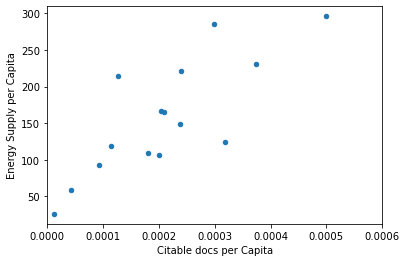

In [ ]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

In [ ]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

**Should I do it with only the top 15 countries???????**

In [75]:
def answer_ten():
    # YOUR CODE HERE
    top15 = answer_one()
    median = top15['% Renewable'].median()

    def create_category(x, M):
        if x >= M:
            return 1
        else:
            return 0
        
    df = top15
    df['HighRenew'] = df['% Renewable'].apply(lambda x: create_category(x, median))
        
    return df['HighRenew']

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [73]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [88]:
def answer_eleven():
    # YOUR CODE HERE

    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

    #ContinentDict[df.index[0]] #GIVES ME THE CONTINENT
    
    #df = whole_dataframe().sort_values(by='Rank', ascending=True).head(15)
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    
    #df.reset_index()

    df['Continent'] = df.index.map(lambda country: ContinentDict[country]) #use it when handling indexes. df['Continent'] = df.apply(lambda x: continent(x, ContinentDict)) #doesn't work
    df = df.groupby('Continent')['Population'].agg(size = np.size, sum = np.sum, mean = np.nanmean, std = np.nanstd)
    df.rename({'nanmean': 'mean', 'nanstd': 'std'}, inplace = True)

    return df
    

answer_eleven()


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [ ]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


In [ ]:
def answer_eleven():
    # YOUR CODE HERE
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    (Energy, _, _) = load_dataset()

    Energy["PopEst"] = Energy["Energy Supply"]/Energy["Energy Supply per Capita"]
    Energy["PopEst"] = pd.to_numeric(Energy["PopEst"])
    Energy["Continent"] = Energy["Country"].map(ContinentDict)
    Energy = Energy[Energy["Continent"].notna()]

    Energy = Energy.groupby("Continent")["PopEst"].agg([len, np.sum, np.mean, np.std])
    Energy = Energy.rename(columns={"len": "size"})

    return Energy

answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    # YOUR CODE HERE
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    top15 = answer_one()

    top15['Continent'] = top15.index.map(lambda x: ContinentDict[x])

    top15['% Renewable Bins'] = pd.cut(top15['% Renewable'], bins = 5)
    
    # We use size() to count the number of countries in each group.
    grouped = top15.groupby(['Continent', '% Renewable Bins']).size()

    return grouped#[ grouped > 0] #we don't include groups with no countries
    

answer_twelve()


#len(answer_twelve()) is 25

Continent      % Renewable Bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

In [ ]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 25, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [ ]:
def answer_thirteen():
    # YOUR CODE HERE
    df = answer_one()

    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    

    PopEst = df['Population'].apply(lambda x: str(x))

    def format_with_separators(number_str):
        # Split the number on the decimal point if it exists
        parts = number_str.split('.')
        
        # The part before the decimal point is formatted with thousands separators
        integer_part_formatted = "{:,}".format(int(parts[0]))
        
        # If there was a decimal part, recombine it with the formatted integer part
        if len(parts) > 1:
            return integer_part_formatted + '.' + parts[1]
        else:
            return integer_part_formatted

    PopEst = PopEst.apply(lambda x: format_with_separators(x))

    return PopEst

    
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object

In [ ]:
def format_with_separators(number_str):
    # Split the number on the decimal point if it exists
    parts = number_str.split('.')
    
    # The part before the decimal point is formatted with thousands separators
    integer_part_formatted = "{:,}".format(int(parts[0]))
    
    # If there was a decimal part, recombine it with the formatted integer part
    if len(parts) > 1:
        return integer_part_formatted + '.' + parts[1]
    else:
        return integer_part_formatted

# Example usage
number_str = "1367645161.2903225"
formatted_str = format_with_separators(number_str)
print(formatted_str)

1,367,645,161.2903225


In [ ]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


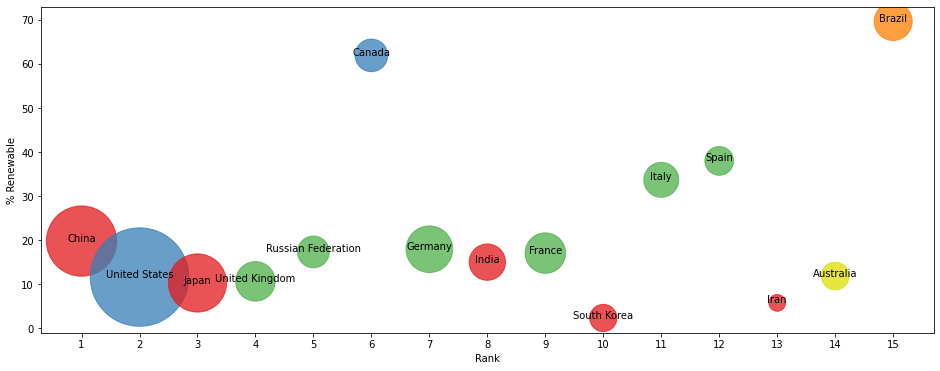

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()